<a href="https://colab.research.google.com/github/Siva-keerthy/OIBSIP_Datascience_Task2/blob/main/Unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Infobyte_internship/Unemployment in India.csv'
data = pd.read_csv(file_path)
display(data.head())

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
file_path = '/content/drive/MyDrive/Infobyte_internship/Unemployment_Rate_upto_11_2020.csv'
df2 = pd.read_csv(file_path)
display(df2.head())

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
print(data.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


Data pre-processing


In [ ]:
data[' Date'] = pd.to_datetime(data[' Date'], dayfirst=True)
print(data.isnull().sum())
data.fillna(method='ffill', inplace=True)
print(data.describe())
data['Month'] = data[' Date'].dt.month

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64
                                Date  Estimated Unemployment Rate (%)  \
count                            768                       768.000000   
mean   2019-12-20 01:48:45.000000256                        11.627969   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.720000   
50%              2019-12-31 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.472500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.566371   

       

/tmp/ipython-input-18-1626926453.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


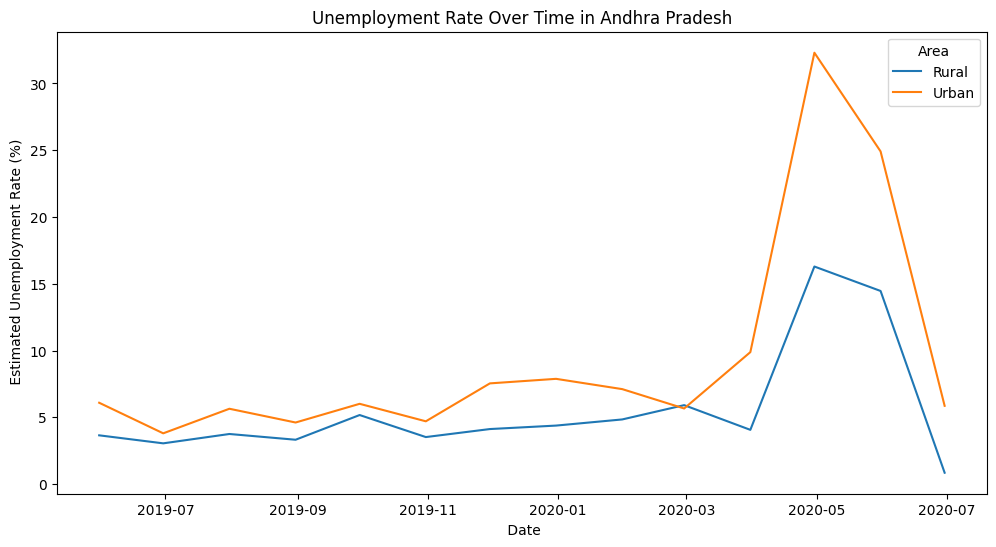

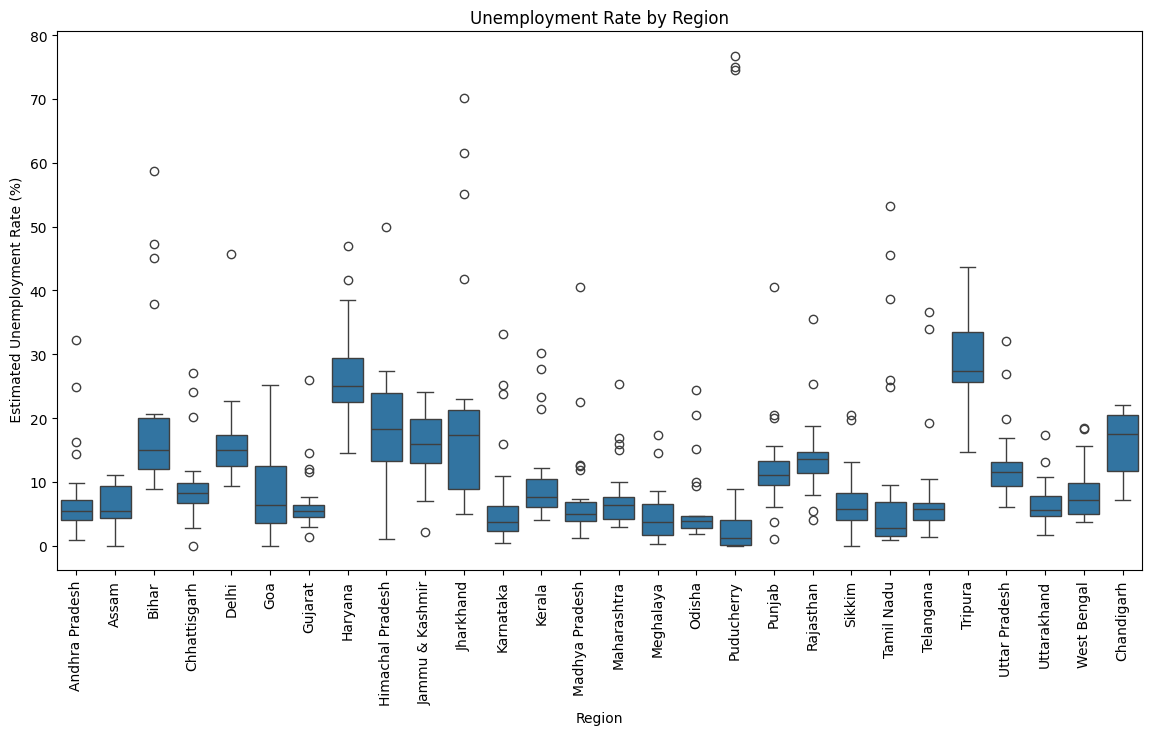

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trend over time
plt.figure(figsize=(12,6))
sns.lineplot(data=data[data['Region']=='Andhra Pradesh'], x=' Date', y=' Estimated Unemployment Rate (%)', hue='Area')
plt.title('Unemployment Rate Over Time in Andhra Pradesh')
plt.show()

# Boxplot for region-wise comparison
plt.figure(figsize=(14,7))
sns.boxplot(data=data, x='Region', y=' Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.title('Unemployment Rate by Region')
plt.show()


insights: 1.The unemployment rate in Andhra Pradesh shows fluctuations over time.

2.There's a noticeable spike during the lockdown months (April–June 2020), particularly in urban areas, which were more affected.

3.Rural areas maintained more stability compared to urban zones.

Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Name:  Estimated Unemployment Rate (%), dtype: float64


/tmp/ipython-input-14-3391661858.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg_unemployment.index, y=region_avg_unemployment.values, palette='viridis')


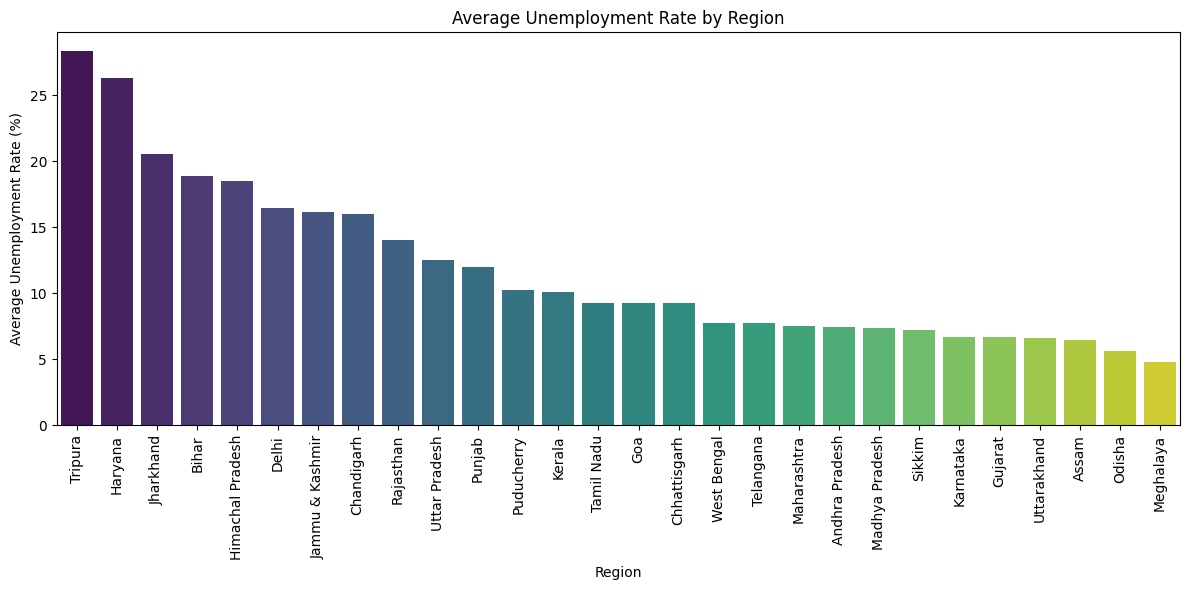

In [ ]:
# Group by Region and calculate average unemployment rate
region_avg_unemployment = data.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

# Display top regions
print(region_avg_unemployment.head())
plt.figure(figsize=(12,6))
sns.barplot(x=region_avg_unemployment.index, y=region_avg_unemployment.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Average Unemployment Rate by Region')
plt.tight_layout()
plt.show()

Insights :
The region Tripura affected most during the lock down.


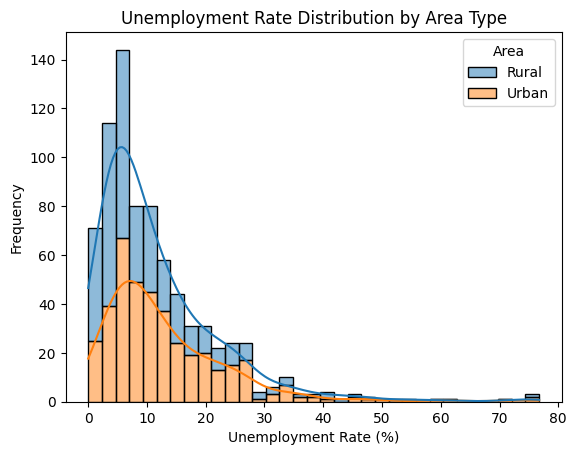

In [ ]:
sns.histplot(data=data, x=' Estimated Unemployment Rate (%)', hue='Area', kde=True, multiple='stack')
plt.title('Unemployment Rate Distribution by Area Type')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()


Insights;
Data is more from rural areas, but urban areas show higher variance in unemployment.

Urban zones may be more economically volatile during crises.

In [ ]:
after_lockdown = data[data['Month'].between(4, 6)]
before_lockdown = data[data['Month'].between(1, 3)]

# Group by state
after_avg = after_lockdown.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()
before_avg = before_lockdown.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Merge for comparison
comparison = before_avg.merge(after_avg, on='Region', suffixes=('_Before', '_After'))

# Rename columns
comparison.columns = ['State', 'Unemployment Rate Before Lockdown', 'Unemployment Rate After Lockdown']
comparison.head()

,State,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,6.243333,11.126000
1,Assam,6.480000,6.563333
2,Bihar,14.276667,27.459000
3,Chandigarh,19.366667,12.656667
4,Chhattisgarh,8.683333,12.720000


Insights:
Every states shows a rise in unemployment rate after lock down.
Bihar, Delhi, Tripura, and Puducherry saw the highest increases.

<Figure size 1200x600 with 0 Axes>

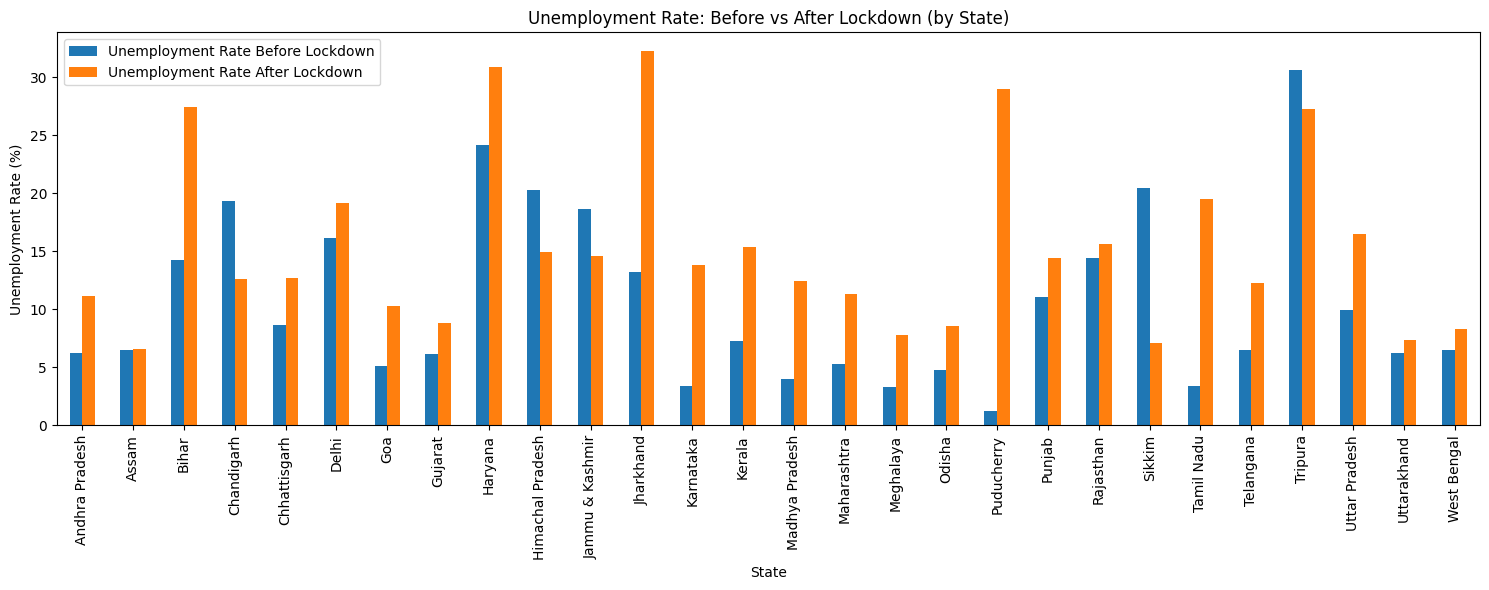

In [ ]:
plt.figure(figsize=(12, 6))
comparison.set_index('State')[['Unemployment Rate Before Lockdown', 'Unemployment Rate After Lockdown']].plot(kind='bar', figsize=(15, 6))
plt.title('Unemployment Rate: Before vs After Lockdown (by State)')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
